# Basic Stock Charts
Just some simple examples of stock related charts to test out the different libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime
import time
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%run finance.ipynb #import of the functions defined in the finance.ipynb notebook

In [2]:
tickers = ['AAPL','GS','COST','DIS','JD']
start_date = '2019-01-01'
end_date = '2023-04-22'

In [3]:
ptf = getPtf(tickers,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ptf.tail()

JD                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-04-17  37.862000  38.169998  37.549999  38.049999  38.049999  10919300   
2023-04-18  38.299999  38.419998  37.525002  37.730000  37.730000   9551100   
2023-04-19  36.820000  37.139999  36.660000  37.099998  37.099998   8405100   
2023-04-20  36.459999  36.759998  35.970001  36.189999  36.189999  12624500   
2023-04-21  35.500000  35.755001  35.215000  35.630001  35.630001  10111500   

                                                   ...      AAPL           \
           Adj Open Adj High Adj Low Daily Return  ...    Volume Adj Open   
Date                                               ...                      
2023-04-17   37.862   38.170  37.550     0.032564  ...  41516200   165.09   
2023-04-18   38.300   38.420  37.525    -0.008410  ...  49923000   166.10   
2023-04-19   36.820   37.140  36.660    -0.016698  ...  47720200   165.80   
2023-04-20   36.460   36.760  35.970    -0.024528  ...  52456400   166.09   
2023-04-21   35.500   35.755  35.215    -0.015474  ...  58311900   165.05   

                                                                       \
           Adj High Adj Low Daily Return Log Return Cumulative Return   
Date                                                                    
2023-04-17   165.39  164.03     0.000121   0.000121          4.347737   
2023-04-18   167.41  165.65     0.007505   0.007477          4.380366   
2023-04-19   168.16  165.54     0.006968   0.006944          4.410889   
2023-04-20   167.87  165.56    -0.005846  -0.005863          4.385102   
2023-04-21   166.45  164.49    -0.009781  -0.009829          4.342211   

                                                
            MA 10 Days  MA 20 Days  MA 50 Days  
Date                                            
2023-04-17  163.915001  161.839999  155.486516  
2023-04-18  163.945001  162.293500  155.730627  
2023-04-19  164.145001  162.711000  156.053253  
2023-04-20  164.434001  163.152000  156.297968  
2023-04-21  164.470001  163.456500  156.564600  

[5 rows x 75 columns]

<AxesSubplot:>

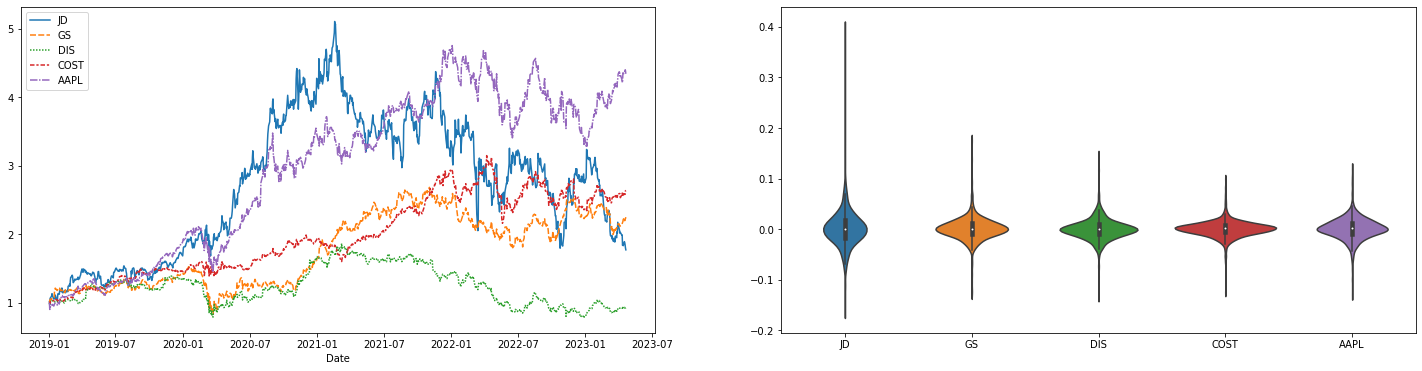

In [5]:
#some charts using seaborn
fig, (ax1, ax2 ) = plt.subplots(1, 2,figsize=(25,6))
sns.lineplot(data = getSpecificColumns(ptf, 'Cumulative Return',ptf.columns.levels[0]), ax = ax1)
sns.violinplot(data = getSpecificColumns(ptf, 'Daily Return', ptf.columns.levels[0]), ax = ax2)

In [6]:
ptf.JD

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-12-31  22.040001  22.480000  20.770000  20.930000  20.112410  19422400   
2019-01-02  20.309999  21.480000  20.180000  21.270000  20.439127  15840000   
2019-01-03  20.889999  21.139999  20.250000  20.350000  19.555067  18608000   
2019-01-04  20.980000  22.680000  20.750000  22.270000  21.400064  25156900   
2019-01-07  22.430000  22.850000  22.260000  22.760000  21.870924  18889800   
...               ...        ...        ...        ...        ...       ...   
2023-04-17  37.862000  38.169998  37.549999  38.049999  38.049999  10919300   
2023-04-18  38.299999  38.419998  37.525002  37.730000  37.730000   9551100   
2023-04-19  36.820000  37.139999  36.660000  37.099998  37.099998   8405100   
2023-04-20  36.459999  36.759998  35.970001  36.189999  36.189999  12624500   
2023-04-21  35.500000  35.755001  35.215000  35.630001  35.630001  10111500   

            Adj Open  Adj High  Adj Low  Daily Return  Log Return  \
Date                                                                
2018-12-31   21.1791   21.6019  19.9587           NaN         NaN   
2019-01-02   19.5166   20.6409  19.3917      0.016245    0.016114   
2019-01-03   20.0740   20.3142  19.4590     -0.043253   -0.044217   
2019-01-04   20.1605   21.7940  19.9394      0.094349    0.090159   
2019-01-07   21.5538   21.9574  21.3905      0.022003    0.021764   
...              ...       ...      ...           ...         ...   
2023-04-17   37.8620   38.1700  37.5500      0.032564    0.032045   
2023-04-18   38.3000   38.4200  37.5250     -0.008410   -0.008446   
2023-04-19   36.8200   37.1400  36.6600     -0.016698   -0.016839   
2023-04-20   36.4600   36.7600  35.9700     -0.024528   -0.024834   
2023-04-21   35.5000   35.7550  35.2150     -0.015474   -0.015595   

            Cumulative Return  MA 10 Days  MA 20 Days  MA 50 Days  
Date                                                               
2018-12-31                NaN         NaN         NaN         NaN  
2019-01-02           1.016245         NaN         NaN         NaN  
2019-01-03           0.972289         NaN         NaN         NaN  
2019-01-04           1.064023         NaN         NaN         NaN  
2019-01-07           1.087434         NaN         NaN         NaN  
...                       ...         ...         ...         ...  
2023-04-17           1.891867   39.353170   39.767394   44.188764  
2023-04-18           1.875956   38.949000   39.749538   43.807843  
2023-04-19           1.844632   38.537000   39.656834   43.432056  
2023-04-20           1.799387   38.105999   39.569859   43.030976  
2023-04-21           1.771543   37.593000   39.377548   42.652980  

[1085 rows x 15 columns]

<AxesSubplot:xlabel='Date', ylabel='Volume'>

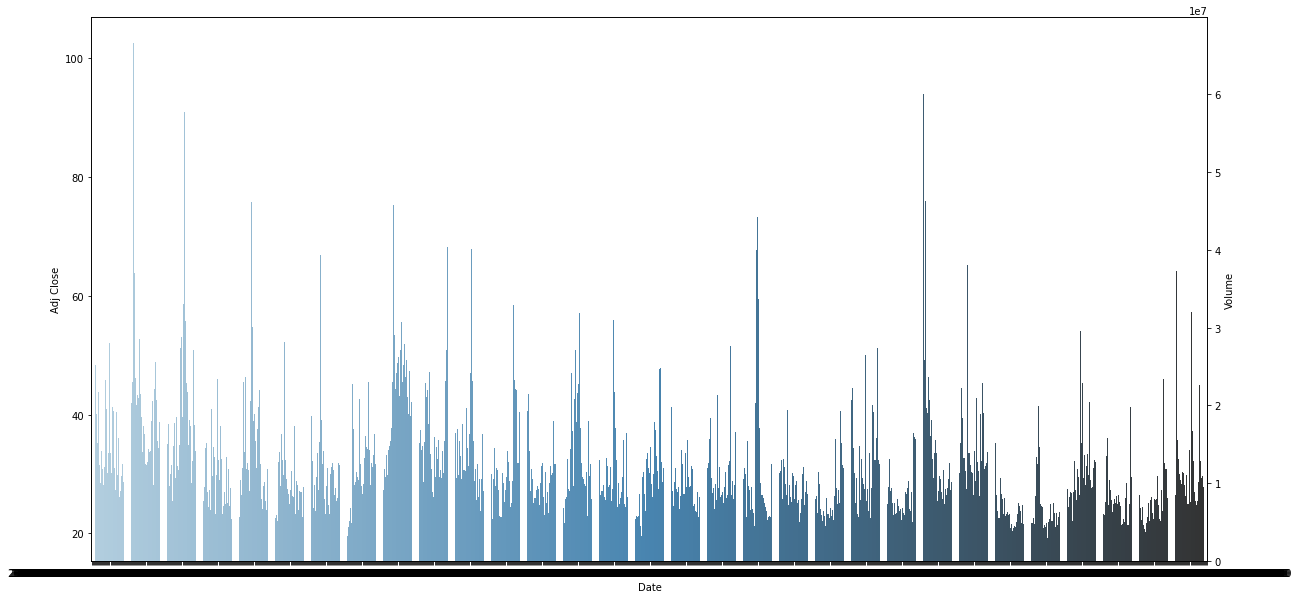

In [7]:
#create chart with double Y axis, for price and volume
fig, ax1 = plt.subplots(figsize = (20,10))
sns.lineplot(data = ptf.JD.reset_index(), x = ptf.JD.reset_index().Date, y = ptf.JD.reset_index()['Adj Close'], ax = ax1, color = 'red')
ax2 = ax1.twinx()
sns.barplot(data = ptf.JD.reset_index(), x = ptf.JD.reset_index().Date, y = ptf.JD.reset_index()['Volume'] , ax = ax2, palette="Blues_d")

In [8]:
n = randomWeights(len(ptf.columns.levels[0]))
ptfPerformance(n, ptf)

(0.2417072540733388, 0.2759709130070083)

<AxesSubplot:xlabel='Date'>

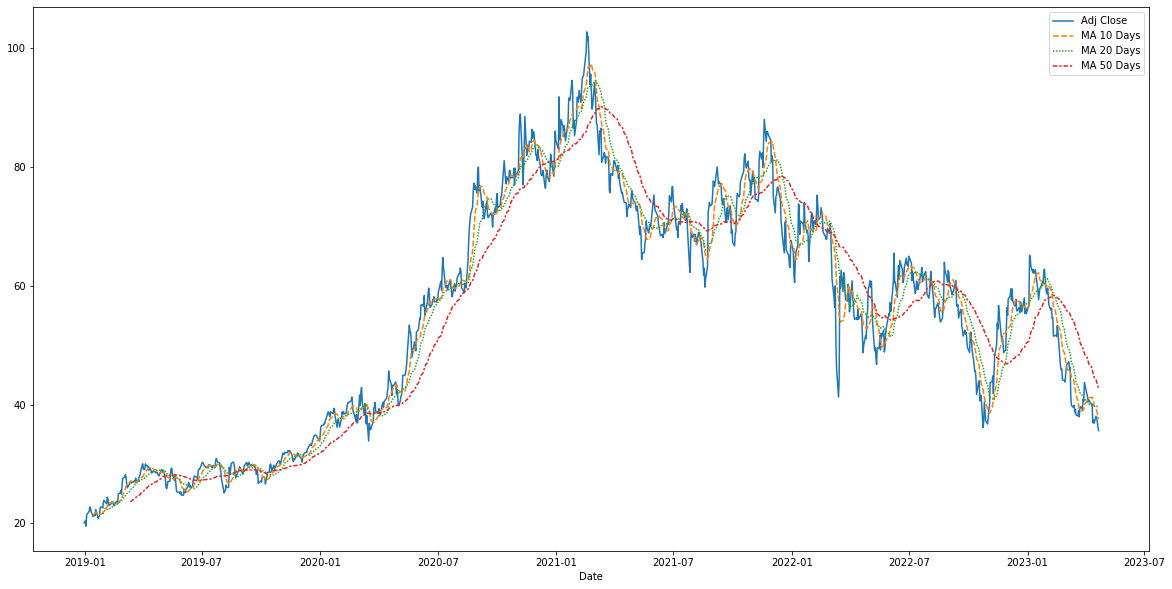

In [9]:
fig, ax1 = plt.subplots(figsize = (20,10))
sns.lineplot(data = ptf.JD[['Adj Close','MA 10 Days','MA 20 Days','MA 50 Days']])

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

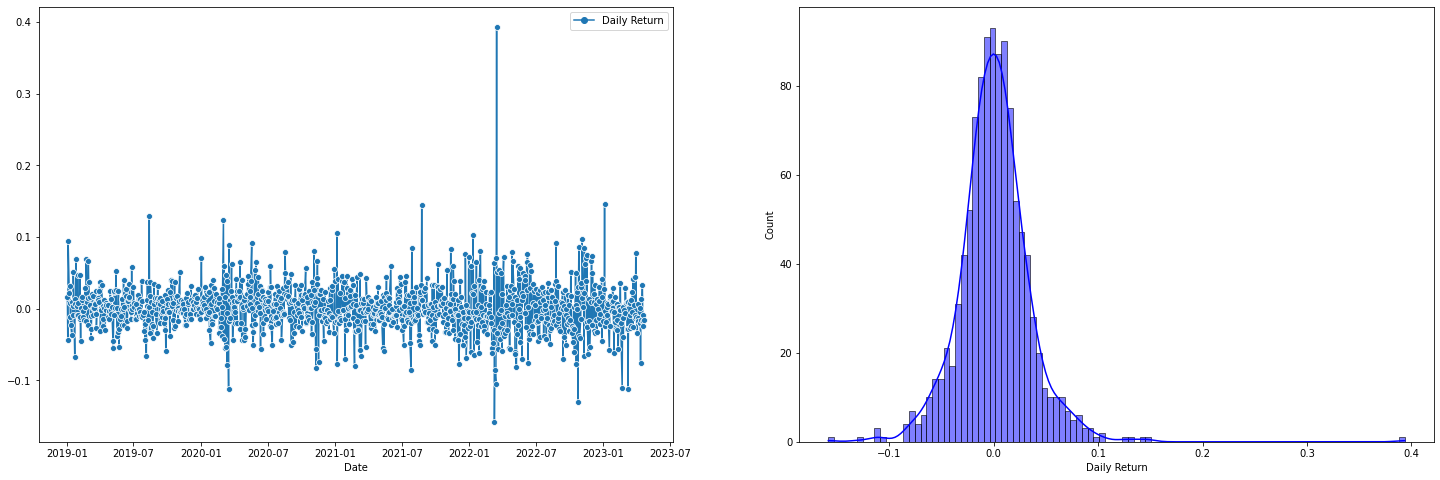

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (25,8))
sns.lineplot(data = ptf.JD[['Daily Return']], markers = True, dashes = True, ax = ax1)
sns.histplot(data = ptf.JD['Daily Return'], bins = 100, color = 'blue', kde = True, ax = ax2)

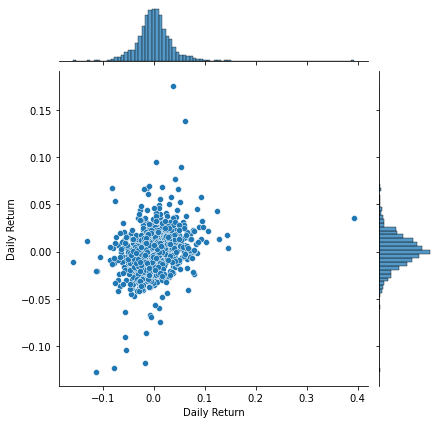

In [12]:
sns.jointplot(x = ptf.JD['Daily Return'], y = ptf.GS['Daily Return'], data = ptf, kind='scatter')

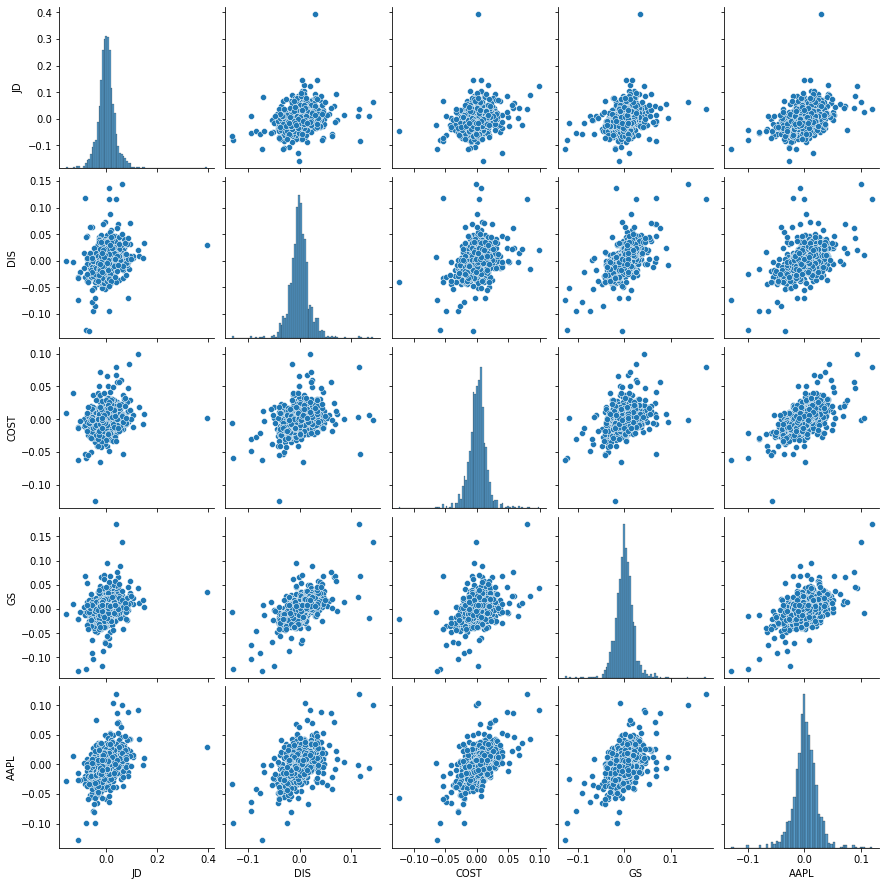

In [13]:
sns.pairplot(ptf.xs('Daily Return', level = 1, axis = 1))

<AxesSubplot:>

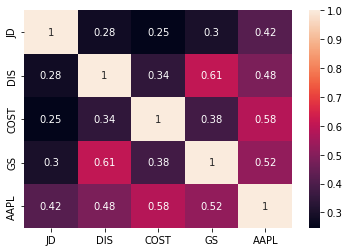

In [15]:
#sns.heatmap correlation plot
sns.heatmap (ptf.xs('Daily Return', level = 1, axis = 1).dropna().corr(), annot = True)

In [20]:
#define variables for the "subsets that are necessary" like the returns dataframe

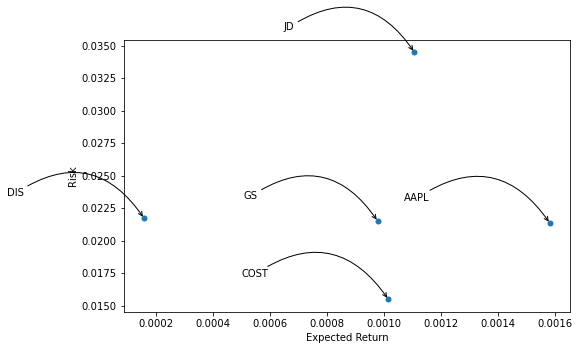

In [16]:

plt.figure(figsize=(8,5))
plt.scatter(ptf.xs('Daily Return', level = 1, axis = 1).dropna().mean(),ptf.xs('Daily Return', level = 1, axis = 1).dropna().std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(ptf.xs('Daily Return', level = 1, axis = 1).columns,ptf.xs('Daily Return', level = 1, axis = 1).mean(),ptf.xs('Daily Return', level = 1, axis = 1).std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

C:\Users\Giorg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AAPL', ylabel='Density'>

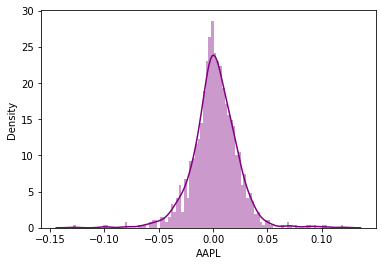

In [17]:
sns.distplot(ptf.xs('Daily Return', level = 1, axis = 1)['AAPL'],bins=100,color='purple')

In [18]:
ptf.xs('Daily Return', level = 1, axis = 1).head()

JD       DIS      COST        GS      AAPL
Date                                                        
2018-12-31       NaN       NaN       NaN       NaN       NaN
2019-01-02  0.016245 -0.006201  0.005154  0.029811  0.001141
2019-01-03 -0.043253 -0.024227 -0.021195 -0.014649 -0.099607
2019-01-04  0.094349  0.030847  0.029039  0.032683  0.042689
2019-01-07  0.022003  0.008667  0.003685  0.005541 -0.002226

In [19]:
ptf.xs('Daily Return', level = 1, axis = 1)['AAPL'].quantile(0.05)

-0.032168030438743445

In [37]:
ptf.xs('Open', level = 1, axis = 1).AAPL.iloc[-1]
ptf.xs('Daily Return', level = 1, axis = 1)['AAPL'].mean()
ptf.xs('Daily Return', level = 1, axis = 1).std()['AAPL'] 

0.021353597229655286

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

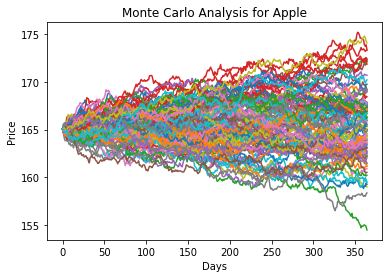

In [32]:
for run in range(100):
    plt.plot(stock_monte_carlo(ptf.xs('Open', level = 1, axis = 1).AAPL.iloc[-1],365,ptf.xs('Daily Return', level = 1, axis = 1)['AAPL'].mean(),ptf.xs('Daily Return', level = 1, axis = 1).std()['AAPL'] ))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [39]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(ptf.xs('Open', level = 1, axis = 1).AAPL.iloc[-1],365,ptf.xs('Daily Return', level = 1, axis = 1)['AAPL'].mean(),ptf.xs('Daily Return', level = 1, axis = 1).std()['AAPL'] )[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock after 365 days')

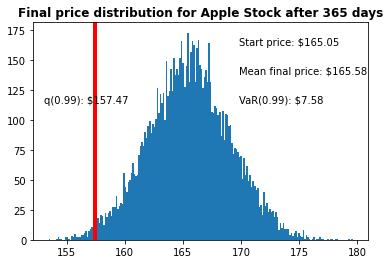

In [42]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %ptf.xs('Open', level = 1, axis = 1).AAPL.iloc[-1])

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (ptf.xs('Open', level = 1, axis = 1).AAPL.iloc[-1] -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" %days, weight='bold')